## 2. **Notas (EXTRAS) internas para fundamentar procesos en pipeline de preprocesado


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

print('Bibliotecas importadas correctamente')
df=pd.read_csv("german_credit_data.txt", 
    sep=r"\s+",        # separador por espacios (uno o más)
    header=None,       # no hay encabezados
    na_values="?"      # convierte '?' en NaN
)
column_names = [
    "status_account",              # ATRIBUTO 1
    "duration",                    # ATRIBUTO 2
    "credit_history",              # ATRIBUTO 3
    "purpose",                     # ATRIBUTO 4
    "credit_amount",               # ATRIBUTO 5
    "savings",                     # ATRIBUTO 6
    "employment_since",            # ATRIBUTO 7
    "installment_rate",            # ATRIBUTO 8
    "personal_status",             # ATRIBUTO 9
    "other_debtors",               # ATRIBUTO 10
    "residence_since",             # ATRIBUTO 11
    "property",                    # ATRIBUTO 12
    "age",                         # ATRIBUTO 13
    "other_installments",          # ATRIBUTO 14
    "housing",                     # ATRIBUTO 15
    "num_credits",                 # ATRIBUTO 16
    "job",                         # ATRIBUTO 17
    "num_liable",                  # ATRIBUTO 18
    "telephone",                   # ATRIBUTO 19
    "foreign_worker",              # ATRIBUTO 20
    "target",                      # ATRIBUTO 21 (variable objetivo)
    "payment_behavior",            # ATRIBUTO 22
    "debt_to_income_ratio",        # ATRIBUTO 23
    "num_previous_loans",          # ATRIBUTO 24
    "monthly_income",              # ATRIBUTO 25
    "credit_duration_ratio",       # ATRIBUTO 26
    "age_employment_interaction",  # ATRIBUTO 27
    "bmi",                         # ATRIBUTO 28
    "gender"                       # ATRIBUTO 29
]
df.columns=column_names
df.tail()

Bibliotecas importadas correctamente


,status_account,duration,credit_history,purpose,credit_amount,savings,employment_since,installment_rate,personal_status,other_debtors,...,foreign_worker,target,payment_behavior,debt_to_income_ratio,num_previous_loans,monthly_income,credit_duration_ratio,age_employment_interaction,bmi,gender
1245,no_checking_account,35.0,existing_paid_duly,car_new,3094.0,no_savings_account,employed_1_to_4yr,4.0,male_single,none,...,foreign_worker_yes,good_client,payment_good,0.110,0.0,500.0,88.40,87.5,20.1,Male
1246,no_checking_account,35.0,critical_account,car_new,8271.0,NaN,employed_1_to_4yr,4.0,female_divorced_married,none,...,foreign_worker_yes,bad_client,payment_poor,0.567,NaN,1016.0,236.31,57.5,25.1,Female
1247,no_checking_account,12.0,critical_account,education,2993.0,savings_below_100,employed_above_7yr,2.0,female_divorced_married,none,...,foreign_worker_yes,good_client,payment_fair,0.166,8.0,500.0,249.42,385.0,21.9,Female
1248,checking_below_0,12.0,existing_paid_duly,car_used,NaN,savings_below_100,employed_above_7yr,3.0,male_single,none,...,foreign_worker_yes,bad_client,payment_poor,NaN,NaN,567.0,NaN,259.0,25.9,Female
1249,checking_0_to_200,33.0,delay_in_past,car_new,2321.0,savings_below_100,employed_above_7yr,4.0,male_single,none,...,foreign_worker_yes,bad_client,payment_fair,0.650,1.0,500.0,70.33,406.0,18.8,Male


In [2]:
# Identificar tipos de variables
numeric_cols=df.select_dtypes(include=['number']).columns.to_list()
categorical_cols=df.select_dtypes(include=["object"]).columns.to_list()

print("Clasificación de variables")
print("=="*60)
print(f"Cantidad de variables numéricas en el dataset es igual a {len(numeric_cols)}")
print(print(f"Cantidad de variables categóricas en el dataset es igual a {len(categorical_cols)}"))
numeric_cols

Clasificación de variables
Cantidad de variables numéricas en el dataset es igual a 13
Cantidad de variables categóricas en el dataset es igual a 16
None


['duration',
 'credit_amount',
 'installment_rate',
 'residence_since',
 'age',
 'num_credits',
 'num_liable',
 'debt_to_income_ratio',
 'num_previous_loans',
 'monthly_income',
 'credit_duration_ratio',
 'age_employment_interaction',
 'bmi']

In [3]:
# Clasificar numéricas en continuas y discretas
discretas=["installment_rate", "num_previous_loans", "residence_since", "num_credits",  "num_liable"]
continuas=["duration","credit_amount", "debt_to_income_ratio", "monthly_income", "credit_duration_ratio", "age_employment_interaction", "bmi", "age"]
print("Clasificación de variables numéricas")
print("\nVariables Discretas")
print(f"En total tenemos ({len(discretas)}) variables discretas:")
print(f"{discretas}")
print("=="*60)
print("\nVariables Continuas")
print(f"En total tenemos ({len(continuas)}) variables continuas:")
print(f"{continuas}")

Clasificación de variables numéricas

Variables Discretas
En total tenemos (5) variables discretas:
['installment_rate', 'num_previous_loans', 'residence_since', 'num_credits', 'num_liable']

Variables Continuas
En total tenemos (8) variables continuas:
['duration', 'credit_amount', 'debt_to_income_ratio', 'monthly_income', 'credit_duration_ratio', 'age_employment_interaction', 'bmi', 'age']


In [4]:
# Clasificar categóricas en nominales y ordinales
nominales=["credit_history", "purpose","personal_status","property", "other_installments", "housing", "telephone", "foreign_worker", "target", "gender" ]
ordinales=["status_account","savings","employment_since","other_debtors", "job", "payment_behavior" ]

print("Clasificación de variables categoricas")
print("\nVariables categoricas Nominales")
print(f"En total tenemos ({len(nominales)}) variables nominales:")
print(f"{nominales}")
print("=="*60)
print("\nVariables ordinales")
print(f"En total tenemos ({len(ordinales)}) variables ordinales:")
print(f"{ordinales}")

Clasificación de variables categoricas

Variables categoricas Nominales
En total tenemos (10) variables nominales:
['credit_history', 'purpose', 'personal_status', 'property', 'other_installments', 'housing', 'telephone', 'foreign_worker', 'target', 'gender']

Variables ordinales
En total tenemos (6) variables ordinales:
['status_account', 'savings', 'employment_since', 'other_debtors', 'job', 'payment_behavior']


In [5]:
#Generamos una matriz general

missing_stats=pd.DataFrame({"faltantes":df.isnull().sum(), 
                            "porcentaje":((df.isnull().sum()/len(df))*100).round(2)})
missing_stats=missing_stats[missing_stats["faltantes"]>0].sort_values(by="faltantes", ascending=False)

print ("Analisis general de cantidad de valores faltantes por columna")
print("--"*80)
print(f"\nEn total hemos identificado una cantidad de ({len(missing_stats)}) columnas con datos faltantes como muestra la siguiente tabla:")
print(f"\n{missing_stats}")
print(f"\n El atributo con mayor cantidad da valores faltantes es ({missing_stats.index[0]}) con ({missing_stats.iloc[0, 0]}) equivalente a un ({missing_stats.loc["savings", "porcentaje"]}%)")

Analisis general de cantidad de valores faltantes por columna
----------------------------------------------------------------------------------------------------------------------------------------------------------------

En total hemos identificado una cantidad de (11) columnas con datos faltantes como muestra la siguiente tabla:

                       faltantes  porcentaje
savings                       43        3.44
credit_duration_ratio         35        2.80
installment_rate              34        2.72
property                      34        2.72
num_previous_loans            33        2.64
credit_amount                 32        2.56
monthly_income                30        2.40
age                           29        2.32
duration                      27        2.16
debt_to_income_ratio          26        2.08
bmi                           25        2.00

 El atributo con mayor cantidad da valores faltantes es (savings) con (43) equivalente a un (3.44%)


In [6]:
variables_con_NAN=missing_stats.index.tolist()
print(variables_con_NAN)

['savings', 'credit_duration_ratio', 'installment_rate', 'property', 'num_previous_loans', 'credit_amount', 'monthly_income', 'age', 'duration', 'debt_to_income_ratio', 'bmi']


In [7]:
#Hacemos un sanalisis de la asimetria de las variables numericas continuas para evaluar el tipo de imputacion
Curtosis=df[numeric_cols].kurtosis()
Asimetria=df[numeric_cols].skew()
lista=[]

asimetria_result=pd.DataFrame({"Asimetria":Asimetria, "Curtosis":Curtosis})
print("\ninterpretación")
for col in numeric_cols:
    skew=df[col].skew()
    kurt=df[col].kurtosis().round(2)
    

    if abs(skew)<0.5:
        #print(f"La distribución de {col} es simétrica")
        Class_skew="Simetrica"
    elif skew>0:
        #print(f"La distribución de {col} es asimétrica con una cola hacia valores grandes (derecha) lo que desplaza la media hacia la derecha media> mediana")
        Class_skew="Asimetrica +"
    else:
        #print(f"La distribución de {col} es asimétrica con una cola hacia valores bajos (izquierda) lo que desplaza la media hacia la izquierda media< mediana")
        Class_skew="Asimetrica -"

    if abs(kurt)<0.5:
        #'Mesocúrtica (normal)'
        Class_Curtosis="Normal"
    elif kurt>0: 
        Class_Curtosis="Puntiaguda"
    else:
        Class_Curtosis="Aplanada"

    propiedades={
    "Atributo":col,
    "Valor skew":skew,
    "Clasificacion skew":Class_skew,
    "Valor Curtosis":kurt,
    "Clasificacion Curtosis":Class_Curtosis
    }
    lista.append(propiedades)

resultado=pd.DataFrame(lista)
resultado




interpretación


,Atributo,Valor skew,Clasificacion skew,Valor Curtosis,Clasificacion Curtosis
0,duration,1.057904,Asimetrica +,0.84,Puntiaguda
1,credit_amount,1.925687,Asimetrica +,4.05,Puntiaguda
2,installment_rate,1.648830,Asimetrica +,16.52,Puntiaguda
3,residence_since,-0.257466,Simetrica,-1.39,Aplanada
4,age,6.132432,Asimetrica +,98.74,Puntiaguda
5,num_credits,1.233160,Asimetrica +,1.37,Puntiaguda
6,num_liable,1.940936,Asimetrica +,1.77,Puntiaguda
7,debt_to_income_ratio,0.754147,Asimetrica +,-0.32,Normal
8,num_previous_loans,0.705428,Asimetrica +,0.34,Normal
9,monthly_income,2.982823,Asimetrica +,10.91,Puntiaguda


In [8]:
mapeo = {
    "Simetrica": "media",
    "Asimetrica +": "mediana",
    "Asimetrica -": "mediana"
}

resultado["imputacion_simple_sugerida"] = resultado["Clasificacion skew"].map(mapeo)
resultado


,Atributo,Valor skew,Clasificacion skew,Valor Curtosis,Clasificacion Curtosis,imputacion_simple_sugerida
0,duration,1.057904,Asimetrica +,0.84,Puntiaguda,mediana
1,credit_amount,1.925687,Asimetrica +,4.05,Puntiaguda,mediana
2,installment_rate,1.648830,Asimetrica +,16.52,Puntiaguda,mediana
3,residence_since,-0.257466,Simetrica,-1.39,Aplanada,media
4,age,6.132432,Asimetrica +,98.74,Puntiaguda,mediana
5,num_credits,1.233160,Asimetrica +,1.37,Puntiaguda,mediana
6,num_liable,1.940936,Asimetrica +,1.77,Puntiaguda,mediana
7,debt_to_income_ratio,0.754147,Asimetrica +,-0.32,Normal,mediana
8,num_previous_loans,0.705428,Asimetrica +,0.34,Normal,mediana
9,monthly_income,2.982823,Asimetrica +,10.91,Puntiaguda,mediana


In [9]:
mapeo_faltentas={'savings':"si",
 'credit_duration_ratio':"si",
 'installment_rate':"si",
 'property':"si",
 'num_previous_loans':"si",
 'credit_amount':"si",
 'monthly_income':"si",
 'age':"si",
 'duration':"si",
 'debt_to_income_ratio':"si",
 'bmi':"si"}

In [10]:
mapeo_continuas= {
    'duration': 'si',
    'credit_amount': 'si',
    'installment_rate': 'no',
    'residence_since': 'no',
    'age': 'si',
    'num_credits': 'no',
    'num_liable': 'no',
    'debt_to_income_ratio': 'si',
    'num_previous_loans': 'no',
    'monthly_income': 'si',
    'credit_duration_ratio': 'si',
    'age_employment_interaction': 'si',
    'bmi': 'si'
}

In [11]:
resultado["Valores_faltantes_num"]=resultado["Atributo"].map(mapeo_faltentas)
resultado["numericas_continuas"]=resultado["Atributo"].map(mapeo_continuas)
resultado

,Atributo,Valor skew,Clasificacion skew,Valor Curtosis,Clasificacion Curtosis,imputacion_simple_sugerida,Valores_faltantes_num,numericas_continuas
0,duration,1.057904,Asimetrica +,0.84,Puntiaguda,mediana,si,si
1,credit_amount,1.925687,Asimetrica +,4.05,Puntiaguda,mediana,si,si
2,installment_rate,1.648830,Asimetrica +,16.52,Puntiaguda,mediana,si,no
3,residence_since,-0.257466,Simetrica,-1.39,Aplanada,media,NaN,no
4,age,6.132432,Asimetrica +,98.74,Puntiaguda,mediana,si,si
5,num_credits,1.233160,Asimetrica +,1.37,Puntiaguda,mediana,NaN,no
6,num_liable,1.940936,Asimetrica +,1.77,Puntiaguda,mediana,NaN,no
7,debt_to_income_ratio,0.754147,Asimetrica +,-0.32,Normal,mediana,si,si
8,num_previous_loans,0.705428,Asimetrica +,0.34,Normal,mediana,si,no
9,monthly_income,2.982823,Asimetrica +,10.91,Puntiaguda,mediana,si,si


In [12]:
# Conclsiones para aplicación de imputación simple según el tipo de distribución de las variables numericas
list_num_imputacion=resultado[resultado["Valores_faltantes_num"]=="si"]["Atributo"].tolist()
print(f"Cantidad de variables numéricas del dataset es igual a ({len(resultado)})")
print(f"Cantidad de variables numéricas con datos faltantes igual ({resultado["Valores_faltantes_num"].notna().sum()})")
print(f"Lista de variables numericas con valores faltantes es la siguiente:")
print(f"{list_num_imputacion}")

#Creacion de lista de columnas numericas con imuptacion por mediana y media 
list_num_imputacion_media=resultado[(resultado["imputacion_simple_sugerida"]=="media")& (resultado["Valores_faltantes_num"]=="si")& (resultado["numericas_continuas"]=="si")]["Atributo"].tolist()

list_num_imputacion_mediana=resultado[(resultado["imputacion_simple_sugerida"]=="mediana")& (resultado["Valores_faltantes_num"]=="si")& (resultado["numericas_continuas"]=="si")]["Atributo"].tolist()

list_num_imputacion_frequencia=resultado[(resultado["Valores_faltantes_num"]=="si")& (resultado["numericas_continuas"]=="no")]["Atributo"].tolist()


print(f"\nVariables numericas continuas con valores faltantes & distribucion (Simetrica), aplicar una imputacion simple por MEDIA. Son en total ({len(list_num_imputacion_media)})")
print(f"Corresponde al siguiente listado: {list_num_imputacion_media}")
print("--"*80)
print(f"Variables numericas continuas con valores & distribucion (Asimetrica) aplicar una imputacion simple por MEDIANA. Son en total ({len(list_num_imputacion_mediana)})")
print(f"{list_num_imputacion_mediana}")
print("--"*80)
print(f"Variables numericas discretas  aplicar una imputacion simple por MEDIANA. Son en total ({len(list_num_imputacion_frequencia)})")
print(f"{list_num_imputacion_frequencia}")

Cantidad de variables numéricas del dataset es igual a (13)
Cantidad de variables numéricas con datos faltantes igual (9)
Lista de variables numericas con valores faltantes es la siguiente:
['duration', 'credit_amount', 'installment_rate', 'age', 'debt_to_income_ratio', 'num_previous_loans', 'monthly_income', 'credit_duration_ratio', 'bmi']

Variables numericas continuas con valores faltantes & distribucion (Simetrica), aplicar una imputacion simple por MEDIA. Son en total (1)
Corresponde al siguiente listado: ['bmi']
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Variables numericas continuas con valores & distribucion (Asimetrica) aplicar una imputacion simple por MEDIANA. Son en total (6)
['duration', 'credit_amount', 'age', 'debt_to_income_ratio', 'monthly_income', 'credit_duration_ratio']
---------------------------------------------------------------------------------

In [13]:
# Aplicamos una imputacion simple por media o por mediana segun lo definido anteriormente 
from sklearn.impute import SimpleImputer

#Imputacion por media a lista de columnas numericas con dist simetrica & valores faltantes
df_simple_imputer=df.copy()
mean_imputer=SimpleImputer(strategy="mean")
df_simple_imputer[list_num_imputacion_media]=mean_imputer.fit_transform(df[list_num_imputacion_media])

median_imputer=SimpleImputer(strategy="median")
df_simple_imputer[list_num_imputacion_mediana]=median_imputer.fit_transform(df[list_num_imputacion_mediana])

print("EVALUACION DE RESULTADOS")
for col in list_num_imputacion:
    print("--"*80)
    print(f"\nAnalisis estadistico de {col}")
    print(f"Media de {col} original: {df[col].mean():.2f}")
    print(f"Media de {col} con imputación simple: {df_simple_imputer[col].mean():.2f}")
    print(f"\nMediana de {col} original: {df[col].median():.2f}")
    print(f"Mediana de {col} con imputación simple: {df_simple_imputer[col].median():.2f}")
    print(f"\nDesv. Estandar de {col} original: {df[col].std():.2f}")
    print(f"Desv. Estandar de {col} con imputación simple: {df_simple_imputer[col].std():.2f}")

EVALUACION DE RESULTADOS
----------------------------------------------------------------------------------------------------------------------------------------------------------------

Analisis estadistico de duration
Media de duration original: 21.15
Media de duration con imputación simple: 21.08

Mediana de duration original: 18.00
Mediana de duration con imputación simple: 18.00

Desv. Estandar de duration original: 12.45
Desv. Estandar de duration con imputación simple: 12.32
----------------------------------------------------------------------------------------------------------------------------------------------------------------

Analisis estadistico de credit_amount
Media de credit_amount original: 3301.50
Media de credit_amount con imputación simple: 3276.04

Mediana de credit_amount original: 2307.00
Mediana de credit_amount con imputación simple: 2307.00

Desv. Estandar de credit_amount original: 2890.80
Desv. Estandar de credit_amount con imputación simple: 2857.85
----

In [14]:
#Comprobamos que ninguna columna numerica con valores faltantes presente valores faltantes

df_simple_imputer[list_num_imputacion].isna().sum()

duration                  0
credit_amount             0
installment_rate         34
age                       0
debt_to_income_ratio      0
num_previous_loans       33
monthly_income            0
credit_duration_ratio     0
bmi                       0
dtype: int64

In [15]:
#Todavía existen columnas categoricas con valores faltantes procedemos a identificarlas primero y posteriormente aplicar una imputacion simple por moda
df[categorical_cols].isna().sum()

status_account         0
credit_history         0
purpose                0
savings               43
employment_since       0
personal_status        0
other_debtors          0
property              34
other_installments     0
housing                0
job                    0
telephone              0
foreign_worker         0
target                 0
payment_behavior       0
gender                 0
dtype: int64

In [16]:
# Iteramos col categoricas para identificar que columnas tiene valores faltantes y crear la lista de col_categorias con valores faltantes
list_col_catg_imput=[]
for col in df[categorical_cols]:
    if df[col].isna().sum()>0:
        list_col_catg_imput.append(col)
print(f"En total tenemos ({len(list_col_catg_imput)}) columnas categoricas con valores faltantes:")
print(list_col_catg_imput)


En total tenemos (2) columnas categoricas con valores faltantes:
['savings', 'property']


In [17]:
#Procedemos a realizar una imputacion simple por moda en las columnas con valores faltantes categoricos
from sklearn.impute import SimpleImputer

mode_imputer=SimpleImputer(strategy="most_frequent")
df_simple_imputer[list_col_catg_imput]=mode_imputer.fit_transform(df[list_col_catg_imput])

print("EVALUACION IMPUTACION")
print("evaluamos que ninguna columna presente valores faltantes")
print(f"Valores faltantes de df_simple_imputer ({df_simple_imputer.isna().sum().sum()})")
print("--"*80)
print("Evaluación frecuencia de las variables categoricas antes y despues de la imputación:")
for col in list_col_catg_imput:
    print("--"*80)
    print(f"\nAnalisis de {col}")
    tabla=pd.DataFrame({"original":df[col].value_counts(), "imputacion simple":df_simple_imputer[col].value_counts()})
    print(tabla)



EVALUACION IMPUTACION
evaluamos que ninguna columna presente valores faltantes
Valores faltantes de df_simple_imputer (67)
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluación frecuencia de las variables categoricas antes y despues de la imputación:
----------------------------------------------------------------------------------------------------------------------------------------------------------------

Analisis de savings
                     original  imputacion simple
savings                                         
savings_below_100         719                762
no_savings_account        221                221
savings_100_to_500        127                127
savings_500_to_1000        76                 76
savings_above_1000         64                 64
----------------------------------------------------------------------------------------------------------

<Axes: >

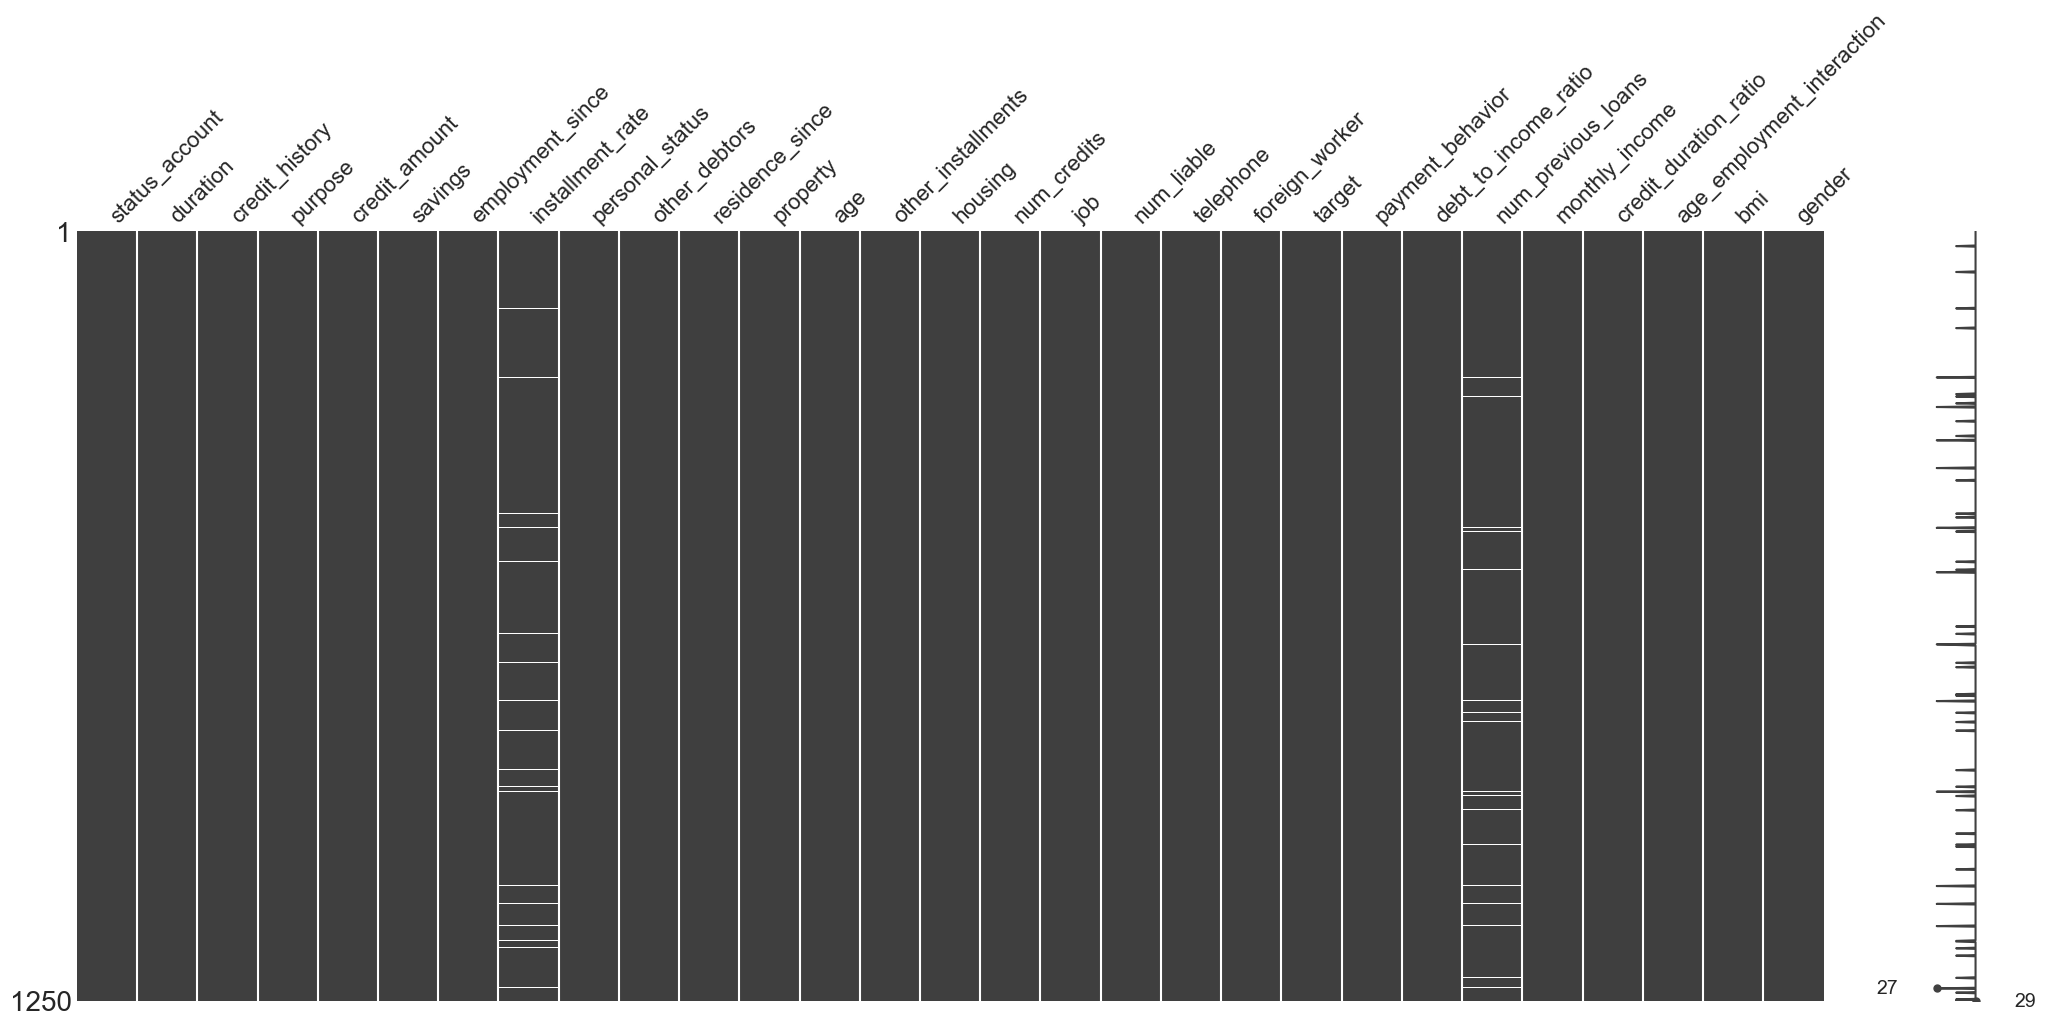

In [18]:
#Ahora procedemos a hacer una ultima prueba de que no hay valores faltantes en la matriz de imputacion simple
import missingno as msno
msno.matrix(df_simple_imputer)

## Preprocesado con pipeline



In [19]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer

In [20]:
df=pd.read_csv("german_credit_data.txt", 
    sep=r"\s+",        # separador por espacios (uno o más)
    header=None,       # no hay encabezados
    na_values="?"      # convierte '?' en NaN
)
column_names = [
    "status_account",              # ATRIBUTO 1
    "duration",                    # ATRIBUTO 2
    "credit_history",              # ATRIBUTO 3
    "purpose",                     # ATRIBUTO 4
    "credit_amount",               # ATRIBUTO 5
    "savings",                     # ATRIBUTO 6
    "employment_since",            # ATRIBUTO 7
    "installment_rate",            # ATRIBUTO 8
    "personal_status",             # ATRIBUTO 9
    "other_debtors",               # ATRIBUTO 10
    "residence_since",             # ATRIBUTO 11
    "property",                    # ATRIBUTO 12
    "age",                         # ATRIBUTO 13
    "other_installments",          # ATRIBUTO 14
    "housing",                     # ATRIBUTO 15
    "num_credits",                 # ATRIBUTO 16
    "job",                         # ATRIBUTO 17
    "num_liable",                  # ATRIBUTO 18
    "telephone",                   # ATRIBUTO 19
    "foreign_worker",              # ATRIBUTO 20
    "target",                      # ATRIBUTO 21 (variable objetivo)
    "payment_behavior",            # ATRIBUTO 22
    "debt_to_income_ratio",        # ATRIBUTO 23
    "num_previous_loans",          # ATRIBUTO 24
    "monthly_income",              # ATRIBUTO 25
    "credit_duration_ratio",       # ATRIBUTO 26
    "age_employment_interaction",  # ATRIBUTO 27
    "bmi",                         # ATRIBUTO 28
    "gender"                       # ATRIBUTO 29
]

In [21]:
df.columns=column_names
df.head()

,status_account,duration,credit_history,purpose,credit_amount,savings,employment_since,installment_rate,personal_status,other_debtors,...,foreign_worker,target,payment_behavior,debt_to_income_ratio,num_previous_loans,monthly_income,credit_duration_ratio,age_employment_interaction,bmi,gender
0,checking_below_0,6.0,critical_account,radio_television,1169.0,no_savings_account,employed_above_7yr,4.0,male_single,none,...,foreign_worker_yes,good_client,payment_excellent,0.084,3.0,500.0,194.83,469.0,27.0,Female
1,checking_0_to_200,48.0,existing_paid_duly,radio_television,5951.0,savings_below_100,employed_1_to_4yr,2.0,female_divorced_married,none,...,foreign_worker_yes,bad_client,payment_fair,0.600,0.0,500.0,123.98,55.0,24.4,Male
2,no_checking_account,12.0,critical_account,education,2096.0,savings_below_100,employed_4_to_7yr,2.0,male_single,none,...,foreign_worker_yes,good_client,payment_excellent,0.099,3.0,500.0,174.67,269.5,27.6,Male
3,checking_below_0,42.0,existing_paid_duly,furniture_equipment,7882.0,savings_below_100,employed_4_to_7yr,2.0,male_single,guarantor,...,foreign_worker_yes,good_client,payment_fair,0.165,5.0,1050.0,187.67,247.5,NaN,Female
4,checking_below_0,24.0,delay_in_past,car_new,4870.0,savings_below_100,employed_1_to_4yr,3.0,male_single,none,...,foreign_worker_yes,bad_client,payment_excellent,0.463,1.0,500.0,202.92,132.5,24.1,Female


### Eliminar valores erroneos fuera de rango permitido antes de preprocesar


In [22]:
#funcion de evaluacion de rangos 
def evaluacion_rangos(df, rangos):
    for col, (min_val, max_val) in rangos.items():
        df = df[
            df[col].isna() |
            ((df[col] >= min_val) & (df[col] <= max_val))
        ]
    return df

In [23]:
rangos = {
    "duration": (4, 72),
    "credit_amount": (250, 18424),
    "installment_rate": (1,4),
    "residence_since": (1,4),
    "age": (18, 75),
    "num_credits": (1,4),
    "num_liable":(1,2),
    "monthly_income": (500, 15000),
    "debt_to_income_ratio": (0.0, 1.0),
    "num_previous_loans": (0, 10),
    "bmi":(17, 38)
}

df_rangos_permitidos = evaluacion_rangos(df, rangos)

In [24]:
print(f"Dataframe antes de la evaluación de rangos permitidos: {df.shape}")
print(f"Dataframe despues de eliminar valores fuera de rangos permitidos: {df_rangos_permitidos.shape}")
print(f"En total se eliminaron ({df.shape[0]-df_rangos_permitidos.shape[0]}) filas")

Dataframe antes de la evaluación de rangos permitidos: (1250, 29)
Dataframe despues de eliminar valores fuera de rangos permitidos: (1215, 29)
En total se eliminaron (35) filas


In [25]:
#Verificaion de rangos en todo el dataframe que tenia valores fuera de rangos permitidos:
df=df_rangos_permitidos.copy()
df.describe()

,duration,credit_amount,installment_rate,residence_since,age,num_credits,num_liable,debt_to_income_ratio,num_previous_loans,monthly_income,credit_duration_ratio,age_employment_interaction,bmi
count,1189.000000,1183.000000,1182.000000,1215.000000,1187.000000,1215.000000,1215.000000,1190.000000,1184.000000,1185.000000,1180.000000,1215.000000,1190.000000
mean,21.072330,3313.783601,2.958570,2.837860,35.317607,1.402469,1.153909,0.268540,2.526182,576.309705,170.484119,139.699588,25.168655
std,12.291075,2874.915791,1.116034,1.102288,11.302198,0.571273,0.361011,0.205198,1.705540,190.353426,173.207574,113.347058,3.914995
min,4.000000,250.000000,1.000000,1.000000,18.000000,1.000000,1.000000,0.008000,0.000000,500.000000,24.060000,0.000000,17.000000
25%,12.000000,1365.000000,2.000000,2.000000,27.000000,1.000000,1.000000,0.106000,1.000000,500.000000,89.730000,55.000000,22.400000
50%,18.000000,2320.000000,3.000000,3.000000,33.000000,1.000000,1.000000,0.182500,2.000000,500.000000,130.950000,100.000000,25.200000
75%,24.000000,4017.000000,4.000000,4.000000,42.000000,2.000000,1.000000,0.475250,4.000000,500.000000,211.152500,214.500000,27.675000
max,72.000000,15945.000000,4.000000,4.000000,75.000000,4.000000,2.000000,0.985000,9.000000,1818.000000,3175.800000,518.000000,38.000000


In [26]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class WinsorizerNP(BaseEstimator, TransformerMixin):
    def __init__(self, lower_quantile=0.01, upper_quantile=0.99):
        self.lower_quantile = lower_quantile
        self.upper_quantile = upper_quantile

    def fit(self, X, y=None):
        X = np.asarray(X, dtype=float)
        self.lower_ = np.nanquantile(X, self.lower_quantile, axis=0)
        self.upper_ = np.nanquantile(X, self.upper_quantile, axis=0)
        return self

    def transform(self, X):
        X = np.asarray(X, dtype=float)
        return np.clip(X, self.lower_, self.upper_)

In [27]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class BinaryMapper(BaseEstimator, TransformerMixin):
    def __init__(self, positive_value):
        self.positive_value = positive_value

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = np.asarray(X)
        return (X == self.positive_value).astype(int)

### Transformacion de variables, encoding y tratamiento de outliers

In [28]:
print('COLUMNTRANSFORMER')
print('='*70)
print('\nPermite aplicar diferentes transformaciones a diferentes columnas')

# Preparar datos completos
X = df.drop('target', axis=1)
y = df['target']

# 🔑 Transformar target a binario
y = y.map({
    'bad_client': 0,
    'good_client': 1
})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Definir columnas por tipo
numeric_features= df.select_dtypes(include=['number']).columns.to_list()
# numericas continuas
numercic_continuas=["duration","credit_amount", "debt_to_income_ratio", "monthly_income", "credit_duration_ratio", "age_employment_interaction", "bmi", "age"]

##Separacion de variables numericas continuas en los siguientes grupos:
numeric_continuas_asimetricas_transf_log=["duration","credit_amount", "monthly_income", "credit_duration_ratio"]
numeric_continuas_asimetricas_sin_transf=["debt_to_income_ratio"]
numeric_continuas_asimetricas_transf_sqrt=["age_employment_interaction"]
numeric_continuas_simetricas=["bmi"]
numeric_continuas_bin_width_transf=["age"]

# numericas discretas
numeric_discretas=["installment_rate", "num_previous_loans", "residence_since", "num_credits",  "num_liable"]

# categoricas
categorical_nominal=["status_account","credit_history", "purpose","personal_status","other_debtors", "property", "other_installments", "housing" ]
ordinal_savings=["savings"]
ordinal_employment_since=["employment_since"]
ordinal_job=["job"]
ordinal_payment_behavior=["payment_behavior"]

# Columnas binarias (solo predictores)
binary_foreign_worker_col = ["foreign_worker"]
binary_gender_col = ["gender"]
binary_telephone_col = ["telephone"]

# #Feature engineering
# # =========================================================
# numeric_continuas_asimetricas_transf_log_fe = ["credit_to_income_log"]
# feature_eng_numeric = ["income_per_liable","overall_stability","financial_pressure"]
# feature_eng_numeric_discretas = ["credit_experience","high_risk_profile"]


# # =========================================================
# # INTEGRARLAS A TUS LISTAS EXISTENTES
# # =========================================================
# # (A) Log asimétricas
# numeric_continuas_asimetricas_transf_log = list(set(numeric_continuas_asimetricas_transf_log + numeric_continuas_asimetricas_transf_log_fe))

# # (B) Continuas sin transf
# numeric_continuas_simetricas = list(set(numeric_continuas_simetricas + feature_eng_numeric))

# # (C) Discretas/binarias numéricas (van en num_disc si las tratas como discretas)
# numeric_discretas = list(set(numeric_discretas + feature_eng_numeric_discretas))


print(f'\nVariables numéricas: {numeric_features}')
print(f'Variables categóricas nominales: {categorical_nominal}')
categorical_ordinal = ordinal_savings + ordinal_employment_since + ordinal_job + ordinal_payment_behavior
print(f'Variables categóricas ordinales: {categorical_ordinal}')

# Crear transformadores para cada tipo de variable
print('\nCreando transformadores específicos...')

# Transformador para variables numéricas con distribuacion asimetrica sin transf. necesaria por ejemplo dbt_to_income
numeric_continua_sin_transf= Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
])

# Transformador para variables numéricas continuas con distribuacion asimetrica y valores faltantes y winsorizado
numeric_continua_asimetrica_transformer_log = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ("winsor", WinsorizerNP(0.01, 0.99)),
    ('log', FunctionTransformer(np.log1p, validate=False)),
    ('scaler', StandardScaler())
])

# Transformador para variables numéricas continuas con distribuacion asimetrica, valores faltantes, transf. por raiz y winsorizado
numeric_continua_asimetrica_transformer_sqrt = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ("winsor", WinsorizerNP(0.01, 0.99)),
    ('sqrt', FunctionTransformer(np.sqrt, validate=False)),
    ('scaler', StandardScaler())
])

# Transformador para variables numéricas continuas con distribuacion simetrica, valores faltantes
numeric_continua_simetrica= Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ("winsor", WinsorizerNP(0.01, 0.99)),
    ('scaler', StandardScaler())
])

# Transf. especial variable númerica continua a grupos concretos con intervalos del mismo tamaño
age_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("bin", KBinsDiscretizer(
        n_bins=5,
        encode="ordinal",
        strategy="uniform"
    )),
    ("to_int", FunctionTransformer(lambda X: X.astype(np.int64), validate=False))
])

# Transformador para variables numéricas discretas con valores faltantes
numeric_discretas_transformer= Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
])


# Transformador para variables categóricas nominales
categorical_nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Transformador variable categóricas ordinal savings
savings_ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(
        categories=[['no_savings_account', 'savings_below_100', 'savings_100_to_500', 'savings_500_to_1000', 'savings_above_1000']],
        handle_unknown='use_encoded_value',
        unknown_value=-1
    )),
    ('shift', FunctionTransformer(lambda x: x + 1, validate=False))
])

# Transformador variable categóricas ordinal Employment_since
employment_since_ordinal_transformer= Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(
        categories=[['unemployed', 'employed_below_1yr', 'employed_1_to_4yr', 'employed_4_to_7yr', 'employed_above_7yr']],
        handle_unknown='use_encoded_value',
        unknown_value=-1
    )),
    ('shift', FunctionTransformer(lambda x: x + 1, validate=False))
])

# Transformador variable categóricas ordinal job
job_ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(
        categories=[['unemployed_unskilled', 'unskilled_resident', 'skilled_employee', 'highly_qualified']],
        handle_unknown='use_encoded_value',
        unknown_value=-1
    )),
    ('shift', FunctionTransformer(lambda x: x + 1, validate=False))
])

# Transformador variable categóricas ordinal payment_behavior
payment_behavior_ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(
        categories=[['payment_poor','payment_fair','payment_good','payment_excellent']],
        handle_unknown='use_encoded_value',
        unknown_value=-1
    )),
    ('shift', FunctionTransformer(lambda x: x + 1, validate=False))
])

foreign_worker_binary_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("binary", BinaryMapper(positive_value="foreign_worker_yese"))
])

gender_binary_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("binary", BinaryMapper(positive_value="Male"))
])

telephone_binary_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("binary", BinaryMapper(positive_value="has_telephone"))
])



print('Transformadores creados')

COLUMNTRANSFORMER

Permite aplicar diferentes transformaciones a diferentes columnas

Variables numéricas: ['duration', 'credit_amount', 'installment_rate', 'residence_since', 'age', 'num_credits', 'num_liable', 'debt_to_income_ratio', 'num_previous_loans', 'monthly_income', 'credit_duration_ratio', 'age_employment_interaction', 'bmi']
Variables categóricas nominales: ['status_account', 'credit_history', 'purpose', 'personal_status', 'other_debtors', 'property', 'other_installments', 'housing']
Variables categóricas ordinales: ['savings', 'employment_since', 'job', 'payment_behavior']

Creando transformadores específicos...
Transformadores creados


In [29]:
preprocessor= ColumnTransformer(
    transformers=[
        ("num_log",  numeric_continua_asimetrica_transformer_log,  numeric_continuas_asimetricas_transf_log),
        ("num_sqrt", numeric_continua_asimetrica_transformer_sqrt, numeric_continuas_asimetricas_transf_sqrt),
        ("num_sym",  numeric_continua_simetrica,                  numeric_continuas_simetricas),
        ("age_bin",  age_pipeline,                                numeric_continuas_bin_width_transf),
        ("debt_i_ratio", numeric_continua_sin_transf,             numeric_continuas_asimetricas_sin_transf),

        ("num_disc", numeric_discretas_transformer,               numeric_discretas),

        ("cat_nom",  categorical_nominal_transformer,             categorical_nominal),

        # ✅ binarias
        ("bin_foreign_worker", foreign_worker_binary_transformer, binary_foreign_worker_col),
        ("bin_gender",         gender_binary_transformer,         binary_gender_col),
        ("bin_telephone",      telephone_binary_transformer,      binary_telephone_col),

        ("ord_sav",  savings_ordinal_transformer,                 ordinal_savings),
        ("ord_emp",  employment_since_ordinal_transformer,        ordinal_employment_since),
        ("ord_job",  job_ordinal_transformer,                     ordinal_job),
        ("ord_pay",  payment_behavior_ordinal_transformer,        ordinal_payment_behavior),
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

print("\nCOLUMNTRANSFORMER CREADO")
print("="*70)
print("\nEstructura del preprocessor:")
for name, transformer, columns in preprocessor.transformers:
    if name != "remainder":
        print(f"\n{name}:")
        print(f"  Columnas: {columns}")
        print(f"  Transformador: {transformer}")


COLUMNTRANSFORMER CREADO

Estructura del preprocessor:

num_log:
  Columnas: ['duration', 'credit_amount', 'monthly_income', 'credit_duration_ratio']
  Transformador: Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('winsor', WinsorizerNP()),
                ('log', FunctionTransformer(func=<ufunc 'log1p'>)),
                ('scaler', StandardScaler())])

num_sqrt:
  Columnas: ['age_employment_interaction']
  Transformador: Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('winsor', WinsorizerNP()),
                ('sqrt', FunctionTransformer(func=<ufunc 'sqrt'>)),
                ('scaler', StandardScaler())])

num_sym:
  Columnas: ['bmi']
  Transformador: Pipeline(steps=[('imputer', SimpleImputer()), ('winsor', WinsorizerNP()),
                ('scaler', StandardScaler())])

age_bin:
  Columnas: ['age']
  Transformador: Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('bin', KBinsDiscretize

In [30]:
for name, trans, cols in preprocessor.transformers:
    if name != "remainder":
        missing = [c for c in cols if c not in X_train.columns]
        if missing:
            print(f"❌ Faltan columnas en {name}: {missing}")

In [31]:
Xt = preprocessor.fit_transform(X_train)
print("OK preprocessor. Shape:", Xt.shape)

OK preprocessor. Shape: (972, 48)


### Pipeline Completo: Preprocesamiento + Modelo

In [32]:
print('PIPELINE COMPLETO')
print('='*70)
print('\nCombinando preprocessor + modelo en un solo pipeline')

# Crear pipeline completo
pipeline_completo = Pipeline(steps=[  
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

print('\nEstructura del pipeline completo:')
print(pipeline_completo)

# Entrenar pipeline
print('\nEntrenando pipeline...')
pipeline_completo.fit(X_train, y_train)
print('Pipeline entrenado')

# Predecir
y_pred_completo = pipeline_completo.predict(X_test)
accuracy_completo = accuracy_score(y_test, y_pred_completo)

print(f'\nAccuracy con pipeline completo: {accuracy_completo:.4f}')

# Reporte de clasificación
print('\nReporte de clasificación:')
print(classification_report(y_test, y_pred_completo,
                          target_names=['No Aprobado', 'Aprobado']))

PIPELINE COMPLETO

Combinando preprocessor + modelo en un solo pipeline

Estructura del pipeline completo:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_log',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('winsor',
                                                                   WinsorizerNP()),
                                                                  ('log',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'credit_amount',
                            

### Visualización del Proceso de Transformación

In [56]:
# Obtener datos transformados
X_train_transformed = pipeline_completo.named_steps['preprocessor'].transform(X_train)
X_test_transformed  = pipeline_completo.named_steps['preprocessor'].transform(X_test)

print(f'\nForma original de X_train: {X_train.shape}')
print(f'Forma transformada de X_train: {X_train_transformed.shape}')
print(f'\nForma original de X_test: {X_test.shape}')
print(f'Forma transformada de X_test: {X_test_transformed.shape}')

# 🔑 USAR EL PREPROCESSOR FITTEADO
preproc_fitted = pipeline_completo.named_steps["preprocessor"]

# Obtener nombres de features después de la transformación
feature_names = []
for name, transformer, columns in preproc_fitted.transformers_:

    if name in [
        'num_log','num_sqrt','num_sym','age_bin','debt_i_ratio','num_disc',
        'bin_foreign_worker','bin_gender','bin_telephone',
        'ord_sav','ord_emp','ord_job','ord_pay'
    ]:
        feature_names.extend(columns)

    elif name == 'cat_nom':
        ohe = transformer.named_steps['onehot']   # YA está fitteado
        cats = ohe.get_feature_names_out(columns)
        feature_names.extend(cats)

print(f'\nNúmero total de features después de transformación: {len(feature_names)}')
print(f'\nNombres de features transformadas:')
for i, name in enumerate(feature_names, 1):
    print(f'  {i}. {name}')


Forma original de X_train: (972, 28)
Forma transformada de X_train: (972, 48)

Forma original de X_test: (243, 28)
Forma transformada de X_test: (243, 48)

Número total de features después de transformación: 48

Nombres de features transformadas:
  1. duration
  2. credit_amount
  3. monthly_income
  4. credit_duration_ratio
  5. age_employment_interaction
  6. bmi
  7. age
  8. debt_to_income_ratio
  9. installment_rate
  10. num_previous_loans
  11. residence_since
  12. num_credits
  13. num_liable
  14. status_account_checking_above_200
  15. status_account_checking_below_0
  16. status_account_no_checking_account
  17. credit_history_critical_account
  18. credit_history_delay_in_past
  19. credit_history_existing_paid_duly
  20. credit_history_no_credits_all_paid
  21. purpose_car_new
  22. purpose_car_used
  23. purpose_domestic_appliances
  24. purpose_education
  25. purpose_furniture_equipment
  26. purpose_others
  27. purpose_radio_television
  28. purpose_repairs
  29. pu

In [34]:
import pandas as pd
import numpy as np
from scipy import sparse

# Si es sparse, conviértelo a denso (ojo si hay MUCHAS columnas)
def to_dense(X):
    return X.toarray() if sparse.issparse(X) else X

X_train_df = pd.DataFrame(to_dense(X_train_transformed), columns=feature_names, index=X_train.index)
X_test_df  = pd.DataFrame(to_dense(X_test_transformed),  columns=feature_names, index=X_test.index)

print(X_train_df.shape, X_test_df.shape)
X_train_df.info()

(972, 48) (243, 48)
<class 'pandas.core.frame.DataFrame'>
Index: 972 entries, 221 to 240
Data columns (total 48 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   duration                                 972 non-null    float64
 1   credit_amount                            972 non-null    float64
 2   monthly_income                           972 non-null    float64
 3   credit_duration_ratio                    972 non-null    float64
 4   age_employment_interaction               972 non-null    float64
 5   bmi                                      972 non-null    float64
 6   age                                      972 non-null    float64
 7   debt_to_income_ratio                     972 non-null    float64
 8   installment_rate                         972 non-null    float64
 9   num_previous_loans                       972 non-null    float64
 10  residence_since                  

###  Feature Engineering

In [35]:


# overall_stability (aquí employment_since ya es ordinal numérico)
X_train_df["overall_stability"] = X_train_df["residence_since"] + X_train_df["employment_since"]
X_test_df["overall_stability"]  = X_test_df["residence_since"]  + X_test_df["employment_since"]

# financial_pressure
X_train_df["financial_pressure"] = X_train_df["installment_rate"] * X_train_df["debt_to_income_ratio"]
X_test_df["financial_pressure"]  = X_test_df["installment_rate"]  * X_test_df["debt_to_income_ratio"]

# high_risk_profile
X_train_df["high_risk_profile"] = ((X_train_df["payment_behavior"] <= 1) & (X_train_df["installment_rate"] >= 3)).astype(int)
X_test_df["high_risk_profile"]  = ((X_test_df["payment_behavior"]  <= 1) & (X_test_df["installment_rate"]  >= 3)).astype(int)

# credit_experience
X_train_df["credit_experience"] = (X_train_df["num_previous_loans"] >= 1).astype(int)
X_test_df["credit_experience"]  = (X_test_df["num_previous_loans"]  >= 1).astype(int)

In [36]:
#Comprobamos el feature engineering se haya realizado 
print(f"El numero de columnas despues del dataengineering corresponde a {X_train_df.shape[1]}")


El numero de columnas despues del dataengineering corresponde a 52


### F. Selección de Features

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import (
    SelectKBest, f_classif, chi2, mutual_info_classif,
    RFE, SelectFromModel, VarianceThreshold
)
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

print('Bibliotecas importadas correctamente')

Bibliotecas importadas correctamente


#### Modelo con todas las Features

In [38]:
# Modelo baseline
model_baseline = RandomForestClassifier(n_estimators=100, random_state=42)
model_baseline.fit(X_train_df, y_train)
y_pred_baseline = model_baseline.predict(X_test_df)
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)

print('BASELINE: Modelo con todas las features')
print('='*60)
print(f'Número de features: {X_train_df.shape[1]}')
print(f'Accuracy: {accuracy_baseline:.4f}')
print('\nReporte de clasificación:')
print(classification_report(y_test, y_pred_baseline))

BASELINE: Modelo con todas las features
Número de features: 52
Accuracy: 0.9959

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        73
           1       0.99      1.00      1.00       170

    accuracy                           1.00       243
   macro avg       1.00      0.99      1.00       243
weighted avg       1.00      1.00      1.00       243



#### Univariate Feature selection

In [39]:
# SelectKBest con ANOVA F-test
k_best = 15
selector_kbest = SelectKBest(score_func=f_classif, k=k_best)
X_train_kbest = selector_kbest.fit_transform(X_train_df, y_train)
X_test_kbest = selector_kbest.transform(X_test_df)

print('FILTER METHOD: SelectKBest (ANOVA F-test)')
print('='*60)
print(f'K (features seleccionadas): {k_best}')
print(f'Features originales: {X_train_df.shape[1]}')
print(f'Features seleccionadas: {X_train_kbest.shape[1]}')

# Obtener scores y features seleccionadas
feature_scores = pd.DataFrame({
    'Feature': X_train_df.columns,
    'Score': selector_kbest.scores_
}).sort_values('Score', ascending=False)

print(f'\nTop {k_best} features por score F:')
print(feature_scores.head(k_best))

# Entrenar modelo
model_kbest = RandomForestClassifier(n_estimators=100, random_state=42)
model_kbest.fit(X_train_kbest, y_train)
y_pred_kbest = model_kbest.predict(X_test_kbest)
accuracy_kbest = accuracy_score(y_test, y_pred_kbest)
print(f'\nAccuracy con SelectKBest: {accuracy_kbest:.4f}')

FILTER METHOD: SelectKBest (ANOVA F-test)
K (features seleccionadas): 15
Features originales: 52
Features seleccionadas: 15

Top 15 features por score F:
                               Feature        Score
7                 debt_to_income_ratio  4317.530384
49                  financial_pressure  1704.663891
47                    payment_behavior   413.540091
50                   high_risk_profile   238.598284
9                   num_previous_loans   153.760090
15  status_account_no_checking_account   108.755893
14     status_account_checking_below_0    65.437641
51                   credit_experience    48.455115
0                             duration    46.504869
16     credit_history_critical_account    32.285685
20                     purpose_car_new    19.893806
6                                  age    19.789944
39                         housing_own    18.415624
26            purpose_radio_television    16.429663
21                    purpose_car_used    14.974243

Accuracy con 

#### Mutual Information

In [40]:
# SelectKBest con Mutual Information
selector_mi = SelectKBest(score_func=mutual_info_classif, k=k_best)
X_train_mi = selector_mi.fit_transform(X_train_df, y_train)
X_test_mi = selector_mi.transform(X_test_df)

print('FILTER METHOD: Mutual Information')
print('='*60)
print(f'Features seleccionadas: {k_best}')

# Features seleccionadas
selected_features_mi = X_train_df.columns[selector_mi.get_support()].tolist()
print(f'\nFeatures seleccionadas:')
for i in selected_features_mi:
    print(i)

# Entrenar modelo
model_mi = RandomForestClassifier(n_estimators=100, random_state=42)
model_mi.fit(X_train_mi, y_train)
y_pred_mi = model_mi.predict(X_test_mi)
accuracy_mi = accuracy_score(y_test, y_pred_mi)
print(f'\nAccuracy con Mutual Information: {accuracy_mi:.4f}')

FILTER METHOD: Mutual Information
Features seleccionadas: 15

Features seleccionadas:
duration
debt_to_income_ratio
num_previous_loans
status_account_no_checking_account
purpose_education
purpose_repairs
personal_status_male_married_widowed
other_installments_installment_stores
housing_own
housing_rent
employment_since
payment_behavior
financial_pressure
high_risk_profile
credit_experience

Accuracy con Mutual Information: 0.9918


#### Métodos Wrapper

##### Recursive Feature Elimination (RFE)

In [41]:
# RFE con Logistic Regression
n_features_rfe = 15
estimator = LogisticRegression(max_iter=1000, random_state=42)
selector_rfe = RFE(estimator, n_features_to_select=n_features_rfe, step=1)
X_train_rfe = selector_rfe.fit_transform(X_train_df, y_train)
X_test_rfe = selector_rfe.transform(X_test_df)

print('WRAPPER METHOD: Recursive Feature Elimination (RFE)')
print('='*60)
print(f'Features seleccionadas: {n_features_rfe}')

# Features seleccionadas y sus rankings
feature_ranking = pd.DataFrame({
    'Feature': X_train_df.columns,
    'Selected': selector_rfe.support_,
    'Ranking': selector_rfe.ranking_
}).sort_values('Ranking')

print('\nFeatures seleccionadas (Ranking = 1):')
top_features = feature_ranking.loc[
    feature_ranking['Ranking'] == 1, 'Feature'
].tolist()

print(top_features)

# Entrenar modelo
model_rfe = RandomForestClassifier(n_estimators=100, random_state=42)
model_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = model_rfe.predict(X_test_rfe)
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)
print(f'\nAccuracy con RFE: {accuracy_rfe:.4f}')

WRAPPER METHOD: Recursive Feature Elimination (RFE)
Features seleccionadas: 15

Features seleccionadas (Ranking = 1):
['payment_behavior', 'credit_history_delay_in_past', 'credit_history_critical_account', 'status_account_no_checking_account', 'high_risk_profile', 'num_credits', 'purpose_radio_television', 'credit_history_existing_paid_duly', 'credit_history_no_credits_all_paid', 'debt_to_income_ratio', 'financial_pressure', 'personal_status_male_divorced_separated', 'property_real_estate', 'other_installments_no_installment', 'installment_rate']

Accuracy con RFE: 0.9877


#### Métodos Embedded
##### Feature importance (Tree-based)

EMBEDDED METHOD: Feature Importance (Random Forest)

Top 15 features más importantes:
                               Feature  Importance
7                 debt_to_income_ratio    0.413932
49                  financial_pressure    0.235282
47                    payment_behavior    0.082875
50                   high_risk_profile    0.041147
9                   num_previous_loans    0.027954
15  status_account_no_checking_account    0.018284
1                        credit_amount    0.015760
4           age_employment_interaction    0.015027
3                credit_duration_ratio    0.014771
0                             duration    0.012577
8                     installment_rate    0.008321
5                                  bmi    0.008222
14     status_account_checking_below_0    0.007344
2                       monthly_income    0.007056
51                   credit_experience    0.007005


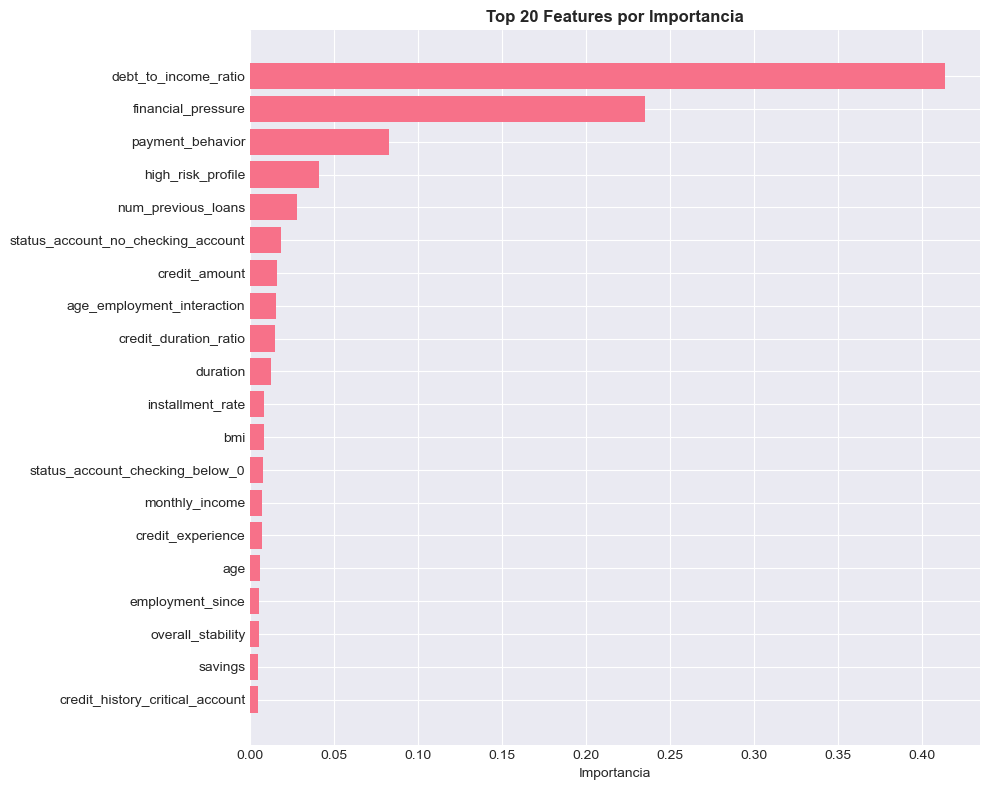

In [42]:
# Feature importance de Random Forest
rf_importance = RandomForestClassifier(n_estimators=100, random_state=42)
rf_importance.fit(X_train_df, y_train)

# Obtener importancias
importances = pd.DataFrame({
    'Feature': X_train_df.columns,
    'Importance': rf_importance.feature_importances_
}).sort_values('Importance', ascending=False)

print('EMBEDDED METHOD: Feature Importance (Random Forest)')
print('='*60)
print('\nTop 15 features más importantes:')
print(importances.head(15))

# Visualización
plt.figure(figsize=(10, 8))
top_n = 20
plt.barh(range(top_n), importances['Importance'].head(top_n))
plt.yticks(range(top_n), importances['Feature'].head(top_n))
plt.xlabel('Importancia')
plt.title(f'Top {top_n} Features por Importancia', fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

##### SelectFromModel

In [43]:
# SelectFromModel con Random Forest
selector_tree = SelectFromModel(rf_importance, threshold='median')
X_train_tree = selector_tree.fit_transform(X_train_df, y_train)
X_test_tree = selector_tree.transform(X_test_df)

print('EMBEDDED METHOD: SelectFromModel (threshold=median)')
print('='*60)
print(f'Features originales: {X_train_df.shape[1]}')
print(f'Features seleccionadas: {X_train_tree.shape[1]}')

# Features seleccionadas
selected_features_tree = X_train_df.columns[selector_tree.get_support()].tolist()
print(f'\nFeatures seleccionadas:')
for i in selected_features_tree:
    print(i)

# Entrenar modelo
model_tree = RandomForestClassifier(n_estimators=100, random_state=42)
model_tree.fit(X_train_tree, y_train)
y_pred_tree = model_tree.predict(X_test_tree)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'\nAccuracy con SelectFromModel: {accuracy_tree:.4f}')

EMBEDDED METHOD: SelectFromModel (threshold=median)
Features originales: 52
Features seleccionadas: 26

Features seleccionadas:
duration
credit_amount
monthly_income
credit_duration_ratio
age_employment_interaction
bmi
age
debt_to_income_ratio
installment_rate
num_previous_loans
residence_since
num_credits
status_account_checking_below_0
status_account_no_checking_account
credit_history_critical_account
purpose_car_new
purpose_radio_television
other_installments_no_installment
savings
employment_since
job
payment_behavior
overall_stability
financial_pressure
high_risk_profile
credit_experience

Accuracy con SelectFromModel: 0.9959


##### L1 Regularization (Lasso)

In [44]:
# Lasso para selección
# Estandarizar primero
scaler = StandardScaler()
X_train_df_scaled = scaler.fit_transform(X_train_df)
X_test_df_scaled = scaler.transform(X_test_df)

# Lasso
lasso = Lasso(alpha=0.001, random_state=42)
lasso.fit(X_train_df_scaled, y_train)

# Features con coeficiente != 0
lasso_coefs = pd.DataFrame({
    'Feature': X_train_df.columns,
    'Coefficient': lasso.coef_
})
lasso_coefs['Abs_Coefficient'] = np.abs(lasso_coefs['Coefficient'])
lasso_coefs = lasso_coefs.sort_values('Abs_Coefficient', ascending=False)

print('EMBEDDED METHOD: Lasso (L1 Regularization)')
print('='*60)
print(f'Features con coef != 0: {(lasso.coef_ != 0).sum()}')
print(f'Features con coef == 0: {(lasso.coef_ == 0).sum()}')
print('\nTop features por coeficiente absoluto:')
print(lasso_coefs.head(15))

EMBEDDED METHOD: Lasso (L1 Regularization)
Features con coef != 0: 41
Features con coef == 0: 11

Top features por coeficiente absoluto:
                               Feature  Coefficient  Abs_Coefficient
7                 debt_to_income_ratio    -0.363798         0.363798
47                    payment_behavior     0.044084         0.044084
50                   high_risk_profile    -0.032850         0.032850
15  status_account_no_checking_account     0.024500         0.024500
43                           telephone     0.019488         0.019488
9                   num_previous_loans     0.019413         0.019413
26            purpose_radio_television     0.019116         0.019116
18   credit_history_existing_paid_duly    -0.015926         0.015926
38   other_installments_no_installment     0.013789         0.013789
46                                 job    -0.013719         0.013719
51                   credit_experience     0.013575         0.013575
2                       monthly_inc

##### Reducción de Dimensionalidad: PCA

In [45]:
# PCA
n_components = 15
pca = PCA(n_components=n_components, random_state=42)
X_train_pca = pca.fit_transform(X_train_df_scaled)
X_test_pca = pca.transform(X_test_df_scaled)

print('DIMENSIONALITY REDUCTION: PCA')
print('='*60)
print(f'Componentes: {n_components}')
print(f'Varianza explicada por cada componente:')
for i, var in enumerate(pca.explained_variance_ratio_[:10]):
    print(f'  PC{i+1}: {var*100:.2f}%')
print(f'\nVarianza total explicada: {pca.explained_variance_ratio_.sum()*100:.2f}%')

# Entrenar modelo
model_pca = RandomForestClassifier(n_estimators=100, random_state=42)
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f'\nAccuracy con PCA: {accuracy_pca:.4f}')

DIMENSIONALITY REDUCTION: PCA
Componentes: 15
Varianza explicada por cada componente:
  PC1: 8.41%
  PC2: 7.05%
  PC3: 6.35%
  PC4: 4.58%
  PC5: 4.08%
  PC6: 3.76%
  PC7: 3.37%
  PC8: 3.11%
  PC9: 2.91%
  PC10: 2.72%

Varianza total explicada: 58.66%

Accuracy con PCA: 0.9424


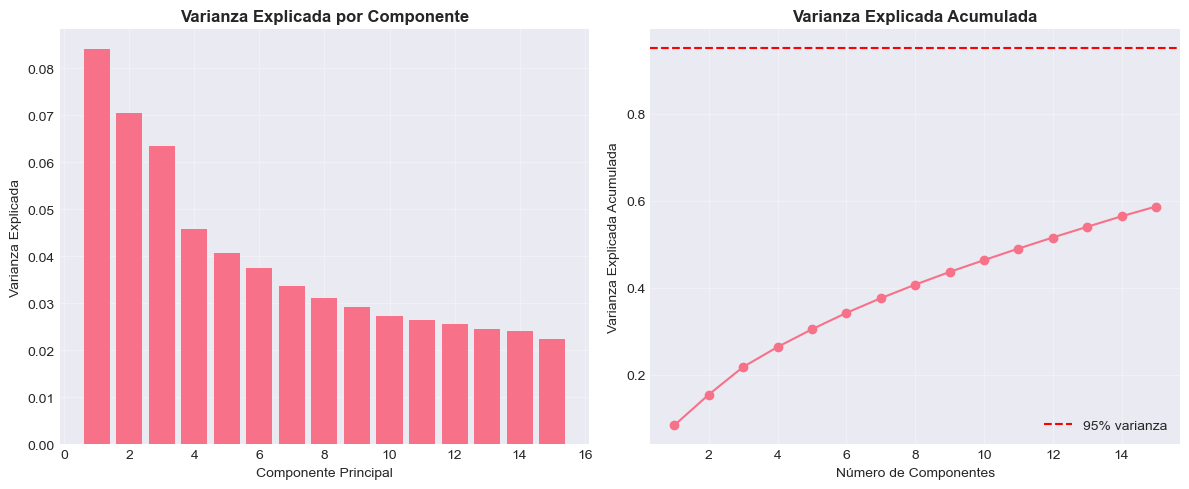

In [46]:
# Visualización de varianza explicada
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(range(1, n_components+1), pca.explained_variance_ratio_)
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente', fontweight='bold')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range(1, n_components+1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada', fontweight='bold')
plt.grid(alpha=0.3)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% varianza')
plt.legend()

plt.tight_layout()
plt.show()

#### Comparación de Métodos de Selección

In [47]:
# Resumen de resultados
resultados = pd.DataFrame({
    'Método': [
        'Baseline (Todas)',
        'SelectKBest (ANOVA)',
        'Mutual Information',
        'RFE',
        'Feature Importance',
        'PCA'
    ],
    'N_Features': [
        X_train_df.shape[1],
        X_train_kbest.shape[1],
        X_train_mi.shape[1],
        X_train_rfe.shape[1],
        X_train_tree.shape[1],
        X_train_pca.shape[1]
    ],
    'Accuracy': [
        accuracy_baseline,
        accuracy_kbest,
        accuracy_mi,
        accuracy_rfe,
        accuracy_tree,
        accuracy_pca
    ]
})

print('COMPARACIÓN DE MÉTODOS DE SELECCIÓN')
print('='*70)
print(resultados.to_string(index=False))
print('\nMejor método:')
best_idx = resultados['Accuracy'].idxmax()
print(f"{resultados.loc[best_idx, 'Método']} con accuracy de {resultados.loc[best_idx, 'Accuracy']:.4f}")

COMPARACIÓN DE MÉTODOS DE SELECCIÓN
             Método  N_Features  Accuracy
   Baseline (Todas)          52  0.995885
SelectKBest (ANOVA)          15  0.995885
 Mutual Information          15  0.991770
                RFE          15  0.987654
 Feature Importance          26  0.995885
                PCA          15  0.942387

Mejor método:
Baseline (Todas) con accuracy de 0.9959


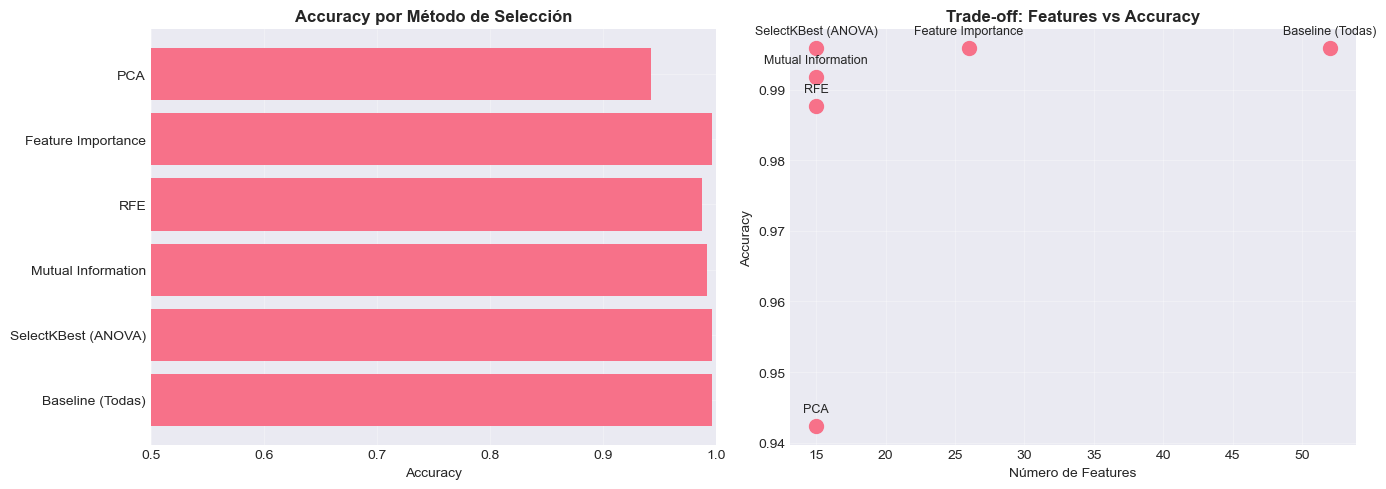

In [48]:
# Visualización comparativa
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy por método
axes[0].barh(resultados['Método'], resultados['Accuracy'])
axes[0].set_xlabel('Accuracy')
axes[0].set_title('Accuracy por Método de Selección', fontweight='bold')
axes[0].set_xlim([0.5, 1.0])
axes[0].grid(alpha=0.3)

# Número de features vs Accuracy
axes[1].scatter(resultados['N_Features'], resultados['Accuracy'], s=100)
for idx, row in resultados.iterrows():
    axes[1].annotate(row['Método'],
                    (row['N_Features'], row['Accuracy']),
                    textcoords='offset points',
                    xytext=(0, 10),
                    ha='center',
                    fontsize=9)
axes[1].set_xlabel('Número de Features')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Trade-off: Features vs Accuracy', fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [49]:
# Comparar features seleccionadas por diferentes métodos
features_comparison = pd.DataFrame({
    'Feature': X_train_df.columns,
    'SelectKBest': selector_kbest.get_support(),
    'MutualInfo': selector_mi.get_support(),
    'RFE': selector_rfe.support_,
    'TreeBased': selector_tree.get_support()
})

# Contar en cuántos métodos aparece cada feature
features_comparison['Count'] = features_comparison[['SelectKBest', 'MutualInfo', 'RFE', 'TreeBased']].sum(axis=1)
features_comparison = features_comparison.sort_values('Count', ascending=False)

print('ANÁLISIS DE CONSISTENCIA DE FEATURES')
print('='*70)
print('\nFeatures seleccionadas por TODOS los métodos:')
all_methods = features_comparison[features_comparison['Count'] == 4]

for feat in all_methods['Feature']:
    print(feat)
print(f'\nTotal: {len(all_methods)} features')

print('\nFeatures seleccionadas por AL MENOS 3 métodos:')
most_methods = features_comparison[features_comparison['Count'] >= 3]
for feat in most_methods['Feature']:
    print(feat)
print(f'\nTotal: {len(most_methods)} features')

ANÁLISIS DE CONSISTENCIA DE FEATURES

Features seleccionadas por TODOS los métodos:
high_risk_profile
financial_pressure
payment_behavior
status_account_no_checking_account
debt_to_income_ratio

Total: 5 features

Features seleccionadas por AL MENOS 3 métodos:
high_risk_profile
financial_pressure
payment_behavior
status_account_no_checking_account
debt_to_income_ratio
duration
num_previous_loans
credit_history_critical_account
purpose_radio_television
credit_experience

Total: 10 features


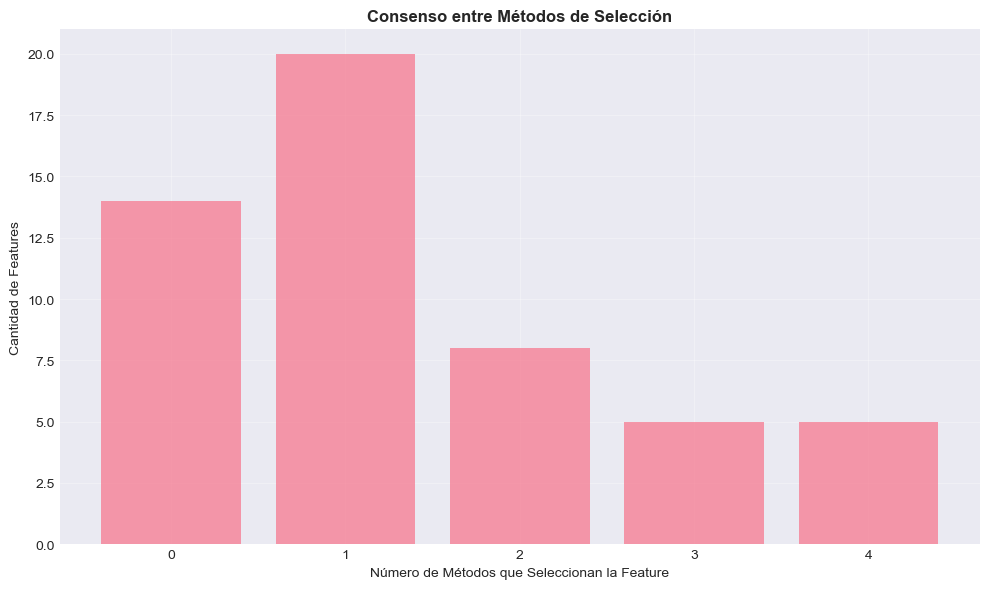

In [50]:
# Visualización de consenso
plt.figure(figsize=(10, 6))
counts = features_comparison['Count'].value_counts().sort_index(ascending=False)
plt.bar(counts.index, counts.values, alpha=0.7)
plt.xlabel('Número de Métodos que Seleccionan la Feature')
plt.ylabel('Cantidad de Features')
plt.title('Consenso entre Métodos de Selección', fontweight='bold')
plt.xticks([0, 1, 2, 3, 4])
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Nos quedamos con features seleccionadas por al menos 3 metodos (≥ 3)

In [51]:
final_features = features_comparison.loc[
    features_comparison['Count'] >= 3, 'Feature'
].tolist()

In [52]:
print(final_features)
print(f"Total features finales: {len(final_features)}")

['high_risk_profile', 'financial_pressure', 'payment_behavior', 'status_account_no_checking_account', 'debt_to_income_ratio', 'duration', 'num_previous_loans', 'credit_history_critical_account', 'purpose_radio_television', 'credit_experience']
Total features finales: 10


In [66]:
X_train_final= X_train_df[final_features]
X_test_final= X_test_df[final_features]

In [67]:
X_train_final.head()

,high_risk_profile,financial_pressure,payment_behavior,status_account_no_checking_account,debt_to_income_ratio,duration,num_previous_loans,credit_history_critical_account,purpose_radio_television,credit_experience
221,0,0.340,3.0,0.0,0.085,-0.688658,3.0,0.0,0.0,1
1004,1,2.232,1.0,0.0,0.558,1.882629,1.0,0.0,0.0,1
69,1,0.852,1.0,1.0,0.213,1.225100,3.0,0.0,1.0,1
656,1,1.736,1.0,0.0,0.434,-0.688658,1.0,0.0,0.0,1
905,0,0.476,2.0,0.0,0.238,-0.688658,2.0,0.0,1.0,1


In [69]:
X_train_final.index.equals(y_train.index)


True

In [70]:
# Exportamos el dataframe ya preprocesado para trabajar en con modelos los distintos modelos de regresion logisitca en el siguiente notebook

assert X_train_final.index.equals(y_train.index)
assert X_test_final.index.equals(y_test.index)

train_final = X_train_final.join(y_train.rename("target"))
test_final  = X_test_final.join(y_test.rename("target"))

train_final.to_csv("train_final.csv")
test_final.to_csv("test_final.csv")